# IPL Datasets Analysis

## Indian Premier Legue

<img src="Image/IPL_logo.jpg" style="width:450px"/>

In [1]:
import numpy as np
import pandas as pd

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf

In [4]:
cf.go_offline()
init_notebook_mode(connected=True)

# Using Mathematics With Pandas,Numpy

In [5]:
df = pd.read_csv('matches.csv')

In [6]:
df.head()  

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
teams = df.melt(value_vars=['team1','team2'],value_name='Total_Teams')  # 'Melt'  is used to reduce to columns in one associated with is't respective value...

In [8]:
teams['Total_Teams'].unique()  # Till now 14 team has been a part of IPL..

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [9]:
print('Total played matches in Indian Premier Legue:',df['season'].count())

Total played matches in Indian Premier Legue: 696


In [10]:
print('Total matches played in each season:')
df['season'].value_counts().sort_values()

Total matches played in each season:


2009    57
2008    58
2017    59
2015    59
2018    60
2016    60
2014    60
2010    60
2011    73
2012    74
2013    76
Name: season, dtype: int64

In [11]:
df.drop('id',axis=1,inplace=True) # I don't want another data for id so i drop it...

In [12]:
print("Individual team's total win in IPL")
df['winner'].value_counts()

Individual team's total win in IPL


Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [13]:
df['toss_decision'].value_counts()

field    413
bat      283
Name: toss_decision, dtype: int64

In [14]:
df[(df['toss_decision']=='field') & (df['toss_winner']==df['winner'])][['toss_winner','winner']]  

,toss_winner,winner
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
5,Sunrisers Hyderabad,Sunrisers Hyderabad
6,Mumbai Indians,Mumbai Indians
...,...,...
683,Royal Challengers Bangalore,Royal Challengers Bangalore
684,Kolkata Knight Riders,Kolkata Knight Riders
691,Chennai Super Kings,Chennai Super Kings
692,Chennai Super Kings,Chennai Super Kings


# 55.2 chance for teams when they choose Field first....

# 45.58 chance for teams when they choose bat first...

## It is possible that captains and coach finds it bowling pitch or team loves to chase...

In [15]:
df[(df['toss_decision']=='bat') & (df['toss_winner']==df['winner'])][['toss_winner','winner']] 

,toss_winner,winner
4,Royal Challengers Bangalore,Royal Challengers Bangalore
14,Delhi Daredevils,Delhi Daredevils
20,Sunrisers Hyderabad,Sunrisers Hyderabad
50,Delhi Daredevils,Delhi Daredevils
54,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...
651,Kings XI Punjab,Kings XI Punjab
663,Sunrisers Hyderabad,Sunrisers Hyderabad
675,Rajasthan Royals,Rajasthan Royals
688,Rajasthan Royals,Rajasthan Royals


# Winning ratio of each team .

In [16]:
df[(df['team1']=='Mumbai Indians') | (df['team2']=='Mumbai Indians')].index # (98/171) MI has won 57.3% of their matches in the history of IPL...

Int64Index([  1,   6,   9,  11,  15,  21,  23,  27,  33,  36,
            ...
            656, 658, 662, 666, 669, 672, 676, 682, 685, 690],
           dtype='int64', length=171)

In [17]:
df[(df['team1']=='Chennai Super Kings') | (df['team2']=='Chennai Super Kings')].index # (90/147) CSK has won 61.2% of their matches in the history of IPL...

Int64Index([ 60,  66,  70,  73,  78,  82,  84,  86,  90,  95,
            ...
            662, 665, 668, 670, 678, 681, 687, 691, 692, 695],
           dtype='int64', length=147)

In [18]:
df[(df['team1']=='Royal Challengers Bangalore') | (df['team2']=='Royal Challengers Bangalore')].index # (79/166) RCB has won 47.6% of their matches in the history of IPL...

Int64Index([  0,   4,   7,  11,  16,  19,  26,  29,  32,  36,
            ...
            654, 659, 664, 666, 670, 674, 680, 683, 686, 688],
           dtype='int64', length=166)

In [19]:
df[(df['team1']=='Kolkata Knight Riders') | (df['team2']=='Kolkata Knight Riders')].index # (86/164) KKR has won 52.4% of their matches in the history of IPL...

Int64Index([  2,   6,  10,  13,  17,  22,  26,  28,  30,  35,
            ...
            661, 664, 668, 672, 676, 679, 684, 689, 693, 694],
           dtype='int64', length=164)

### As we can see CSK wins 61.2% of their matches means that they win 6 matches out of 10 probably and it is highest for any team...

In [20]:
# pd.set_option('display.max_rows',None) # aana thi bdhi rows batade

# Man Of The Match

In [21]:
df['player_of_match'].value_counts().sort_values()

MF Maharoof        1
MA Starc           1
NV Ojha            1
A Singh            1
S Gopal            1
                  ..
DA Warner         15
RG Sharma         16
YK Pathan         16
AB de Villiers    18
CH Gayle          20
Name: player_of_match, Length: 214, dtype: int64

In [22]:
df.groupby('player_of_match')[['winner','venue','team1','team2','toss_winner']].sum()  # This data shows you in which condition player performed well,and won MOM..

,winner,venue,team1,team2,toss_winner
player_of_match,,,,,
A Chandila,Rajasthan Royals,Sawai Mansingh Stadium,Rajasthan Royals,Pune Warriors,Rajasthan Royals
A Kumble,Royal Challengers BangaloreDeccan ChargersRoya...,"MA Chidambaram Stadium, ChepaukNew Wanderers S...",Royal Challengers BangaloreDeccan ChargersDecc...,Chennai Super KingsRoyal Challengers Bangalore...,Royal Challengers BangaloreRoyal Challengers B...
A Mishra,Delhi DaredevilsDelhi DaredevilsDeccan Charger...,Feroz Shah KotlaNew Wanderers StadiumWankhede ...,Delhi DaredevilsKolkata Knight RidersDeccan Ch...,Deccan ChargersDelhi DaredevilsMumbai IndiansD...,Deccan ChargersDelhi DaredevilsDeccan Chargers...
A Nehra,Mumbai IndiansDelhi DaredevilsChennai Super Ki...,Dr DY Patil Sports AcademyBuffalo ParkMA Chida...,Rajasthan RoyalsMumbai IndiansChennai Super Ki...,Mumbai IndiansDelhi DaredevilsDelhi Daredevils...,Mumbai IndiansMumbai IndiansDelhi DaredevilsMu...
A Singh,Rajasthan Royals,SuperSport Park,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
...,...,...,...,...,...
Washington Sundar,Rising Pune Supergiant,Wankhede Stadium,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians
YK Pathan,Rajasthan RoyalsRajasthan RoyalsRajasthan Roya...,"Rajiv Gandhi International Stadium, UppalSawai...",Deccan ChargersDeccan ChargersKolkata Knight R...,Rajasthan RoyalsRajasthan RoyalsRajasthan Roya...,Rajasthan RoyalsRajasthan RoyalsRajasthan Roya...
YS Chahal,Royal Challengers Bangalore,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore


In [23]:
df['dl_applied'].value_counts()

0    677
1     19
Name: dl_applied, dtype: int64

In [24]:
df[df['dl_applied']==1]['city'].unique() # probebility off raining here to watch for....

array(['Bangalore', 'Delhi', 'Kolkata', 'Cape Town', 'Durban',
       'Centurion', 'Kochi', 'Visakhapatnam', 'Hyderabad', 'Jaipur'],
      dtype=object)

In [25]:
df[['winner','win_by_runs','win_by_wickets']].sort_values(by=['win_by_runs','win_by_wickets'])

,winner,win_by_runs,win_by_wickets
33,Mumbai Indians,0,0
125,Rajasthan Royals,0,0
189,Kings XI Punjab,0,0
300,NaN,0,0
387,Sunrisers Hyderabad,0,0
...,...,...,...
410,Royal Challengers Bangalore,130,0
556,Royal Challengers Bangalore,138,0
59,Kolkata Knight Riders,140,0
619,Royal Challengers Bangalore,144,0


In [26]:
df[df['win_by_runs']>100]['winner'].value_counts()  # RCB has the potential to make big scores and convert match one sided

Royal Challengers Bangalore    3
Mumbai Indians                 2
Kings XI Punjab                1
Kolkata Knight Riders          1
Rajasthan Royals               1
Name: winner, dtype: int64

In [27]:
df[df['win_by_wickets']>=7]['winner'].value_counts() # make comparison between this with total win of team.. 

Kolkata Knight Riders          25
Royal Challengers Bangalore    23
Delhi Daredevils               21
Mumbai Indians                 19
Chennai Super Kings            18
Rajasthan Royals               18
Kings XI Punjab                16
Sunrisers Hyderabad            13
Kochi Tuskers Kerala            4
Deccan Chargers                 4
Pune Warriors                   3
Gujarat Lions                   3
Rising Pune Supergiant          2
Rising Pune Supergiants         2
Name: winner, dtype: int64

In [28]:
# Make this function to find the winning ratio of Chennai Super Kings, For all teams you have to find 'total matches'...
def Win_ratio(win,total):
    return win/total*100

In [29]:
umpire_info = pd.melt(df,value_vars=['umpire1','umpire2','umpire3'],var_name='Umpires')

In [30]:
umpire_info.dropna(inplace=True)

In [31]:
umpire_info.rename(columns={'Umpires':'U_ID','value':'U_name'},inplace=True)

# TOP Umpires

In [32]:
umpire_info['U_name'].value_counts().head(10)  # These are the top 10 most used 'Umpires' in world's most popular cricket(IPL) legue...

S Ravi             101
HDPK Dharmasena     87
C Shamshuddin       71
AK Chaudhary        58
SJA Taufel          55
M Erasmus           54
Asad Rauf           51
BR Doctrove         42
CK Nandan           41
RE Koertzen         41
Name: U_name, dtype: int64

In [33]:
df[df['result']=='tie']  # these are the closest encountered matches, you should watch...

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN


In [34]:
df.query('season==[2009,2014]') # As You can see in 2009 the tournament was held out of india(South Africa)...

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
117,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
118,2009,Cape Town,2009-04-18,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,75,0,R Dravid,Newlands,BR Doctrove,RB Tiffin,NaN
119,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
120,2009,Cape Town,2009-04-19,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,bat,normal,0,Deccan Chargers,0,8,RP Singh,Newlands,MR Benson,BR Doctrove,NaN
121,2009,Port Elizabeth,2009-04-20,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2014,Mumbai,2014-05-25,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,CJ Anderson,Wankhede Stadium,K Srinath,RJ Tucker,NaN
513,2014,Kolkata,2014-05-27,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,28,0,UT Yadav,Eden Gardens,NJ Llong,S Ravi,NaN
514,2014,Mumbai,2014-05-28,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,7,SK Raina,Brabourne Stadium,VA Kulkarni,BNJ Oxenford,NaN
515,2014,Mumbai,2014-05-30,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Kings XI Punjab,24,0,V Sehwag,Wankhede Stadium,HDPK Dharmasena,RJ Tucker,NaN


In [35]:
# Here 'duplicates' is used to manage duplicate data in our dataset.....By doing this we can know the winner of each year's IPL finals..Because we "keep" Last data so.....

In [36]:
Trophy = df.drop_duplicates(subset=['season'],keep='last')[['season','winner','venue']].sort_values(by='season').reset_index(drop=True)

In [37]:
print('IPl Season Winner Each Year:')
Trophy['winner'].value_counts()  # MI And CSK are the way too ahead then many teams...most trophies are in their hand..Only 6/14 teams were able to win trophies till now...

IPl Season Winner Each Year:


Chennai Super Kings      3
Mumbai Indians           3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

In [38]:
stadium = Trophy['venue'].value_counts() # Names of stadium where finals held...

# Let's Visualize This

In [39]:
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


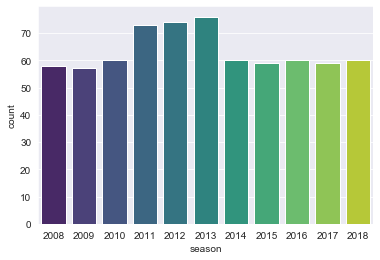

In [40]:
sns.set_style('darkgrid')
sns.countplot(x='season',data=df,palette='viridis') # as we can see 2011-13 are the years having most matches played...almost more han 70...

In [107]:
# Plotly is used here for more interactive diagram...
df['season'].iplot(kind='hist',colors='purple',bins=30,xTitle='Season',yTitle='Matches',title='Total matches per season')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

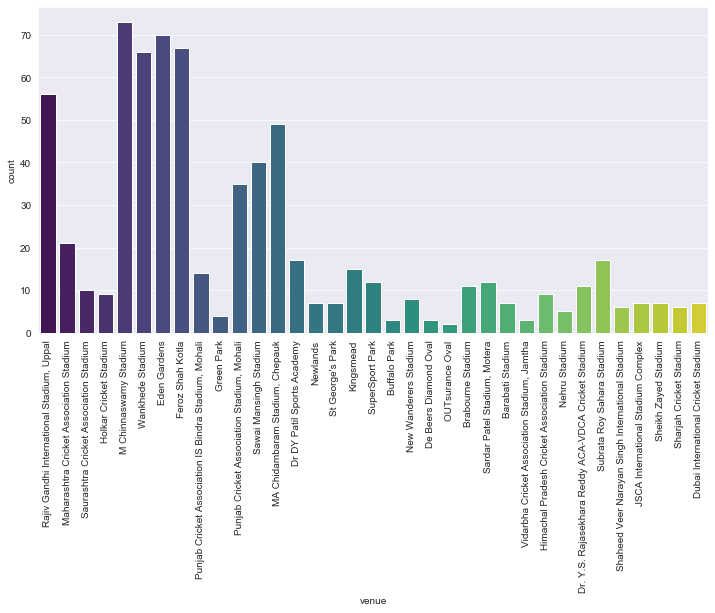

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue',data=df,palette='viridis')
plt.xticks(rotation='vertical')  # Number of times matches has played in such grounds..

In [43]:
df['venue'].iplot(kind='hist',theme='pearl',colors='red')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

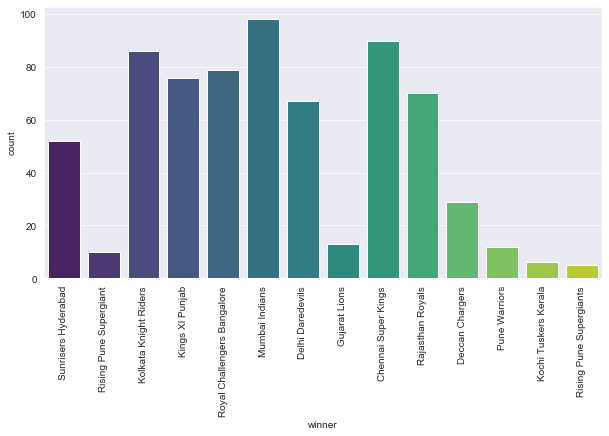

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='winner',data=df,palette='viridis')
plt.xticks(rotation='vertical')  # Total win for each team since tournament started...

(array([ 58.,  57.,  60.,  73.,  74.,  76.,  60.,  59.,  60., 119.]),
 array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
        2017., 2018.]),
 <a list of 10 Patch objects>)

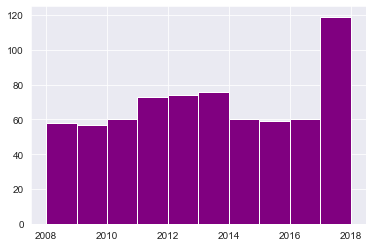

In [118]:
plt.hist(x=df['season'],color='purple')  # NO. of matches in each season...

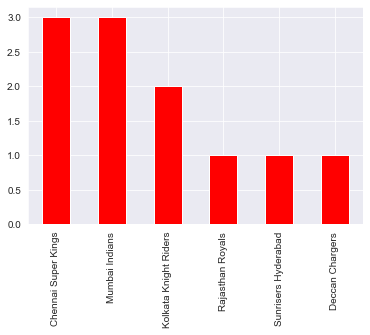

In [46]:
# No. of times team won finals...
Trophy['winner'].value_counts().plot(kind='bar',color='red')

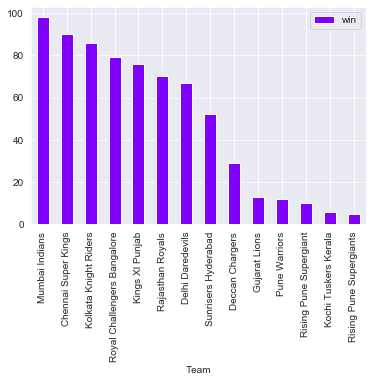

In [120]:
ss= df['winner'].value_counts().to_frame().reset_index().copy()
ss.rename(columns={'index':'Team','winner':'win'},inplace=True)
ss.plot.bar(x='Team',y='win',cmap='rainbow')  # Use built in pandas plotting facility...

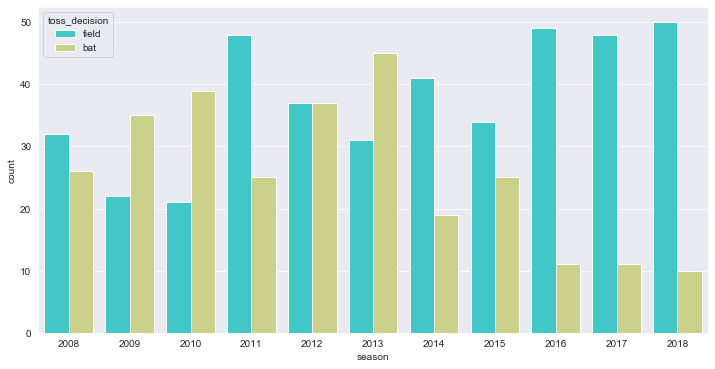

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=df,palette='rainbow') # Matches in each season using simply hue...

In [49]:
dd = df['player_of_match'].value_counts().to_frame().reset_index()
dd.rename(columns={'index':'Player','player_of_match':'MOM'},inplace=True)

In [50]:
dd = dd[dd['MOM']>10]

# Man Of The Match by visualizing..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

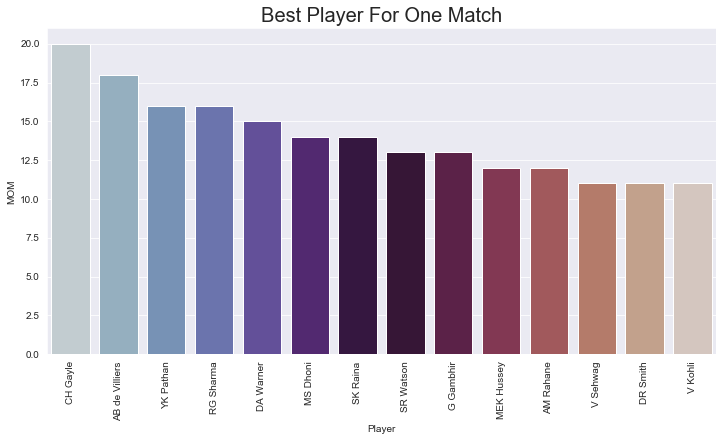

In [103]:
plt.figure(figsize=(12,6))
sns.barplot(x='Player',y='MOM',data=dd,palette='twilight')
plt.title('Best Player For One Match',{'fontsize':20})
plt.xticks(rotation='vertical')  

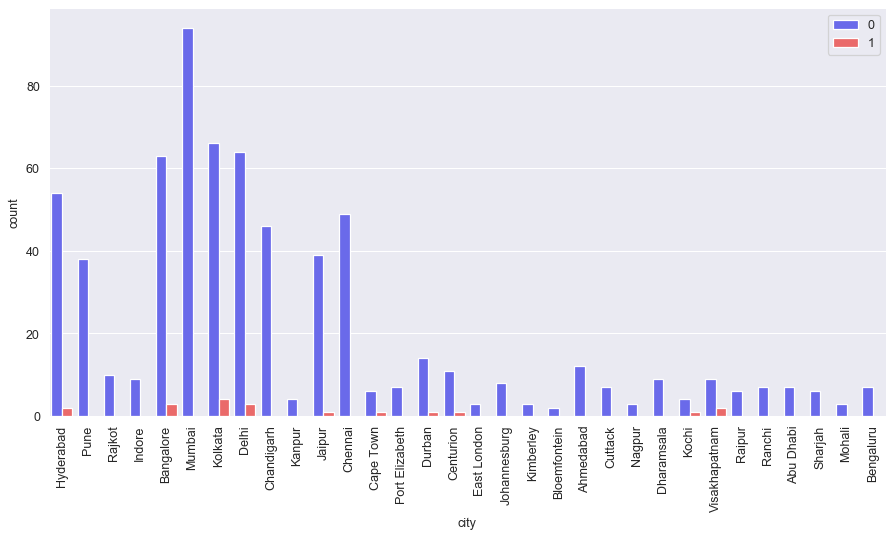

In [102]:
# We can see the city where match had stopped due to rain and result was decided on the basis of "DLS"...
plt.figure(figsize=(12,6),dpi=90)
sns.countplot(x='city',hue='dl_applied',data=df,palette='seismic')
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')

In [53]:
stadium2 = stadium.to_frame().reset_index().rename(columns={'index':'Ground','venue':'Final_held'})

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

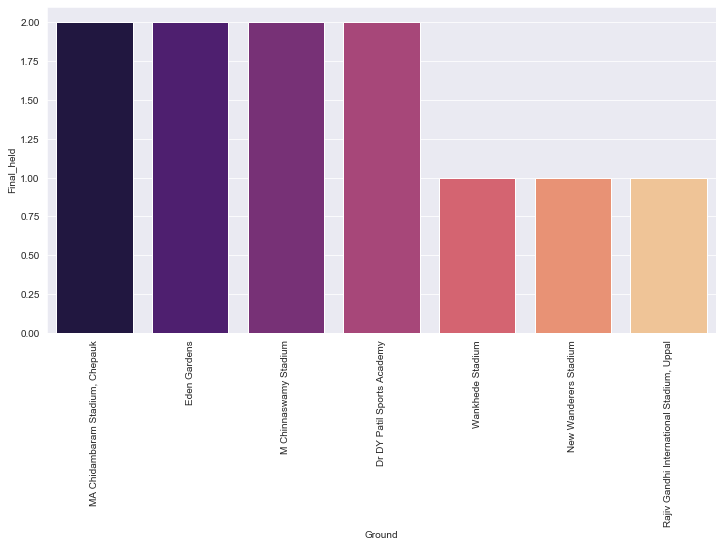

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x='Ground',y='Final_held',data=stadium2,palette='magma')
plt.xticks(rotation='vertical')  # Most favourite ground for finals of "IPL"...

In [55]:
umpire_info1 = umpire_info['U_name'].value_counts().head(10).copy()

In [56]:
umpire_info1.to_frame().reset_index().rename(columns={'index':'U_name','U_name':'Match'},inplace=True)

Text(0.5, 1.0, 'Top Umpires In IPL')

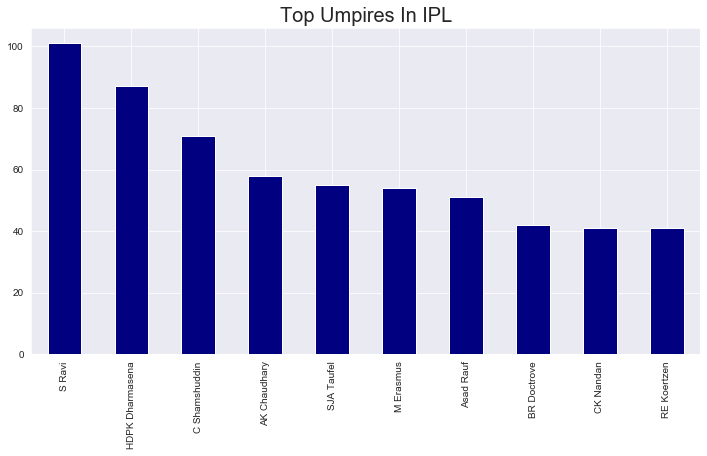

In [101]:
plt.figure(figsize=(12,6))
umpire_info1.plot(kind='bar',x='U_name',y='Match',cmap='jet')
plt.title('Top Umpires In IPL',{'fontsize':20})

Text(0.5, 1.0, 'Toss Decision Percentage')

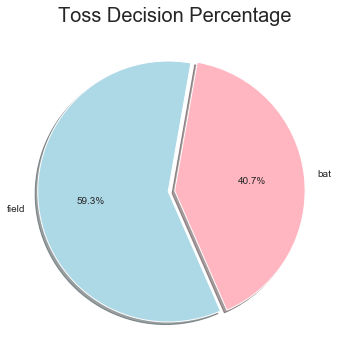

In [117]:
Pie_chart = df['toss_decision'].value_counts().copy()
sizes = (np.array((Pie_chart/Pie_chart.sum())*100))
labels = np.array(Pie_chart.index)
color = ['lightblue','lightpink']
plt.figure(figsize=(12,6))
plt.pie(sizes,labels=labels,colors=color,startangle=80,autopct='%1.1f%%', shadow=True,explode=(0.05,0))
plt.title('Toss Decision Percentage',{'fontsize':20})